In [14]:
!pip install pandas
!pip install numpy
!pip install seaborn


In [15]:
#model imports
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split 

#viz imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

The Model

In [16]:
df = pd.read_csv('train_dataset_preprocessed.csv')

In [17]:
#split data into features/target

x = df.drop(['Outcome', 'profit_2', 'profit_x','odds_ft_x', 'odds_ft_2'], axis=1) #dropping extra info
y = df['Outcome']

In [18]:
#train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [19]:
print(y_train.value_counts())
print(y_test.value_counts())

Outcome
0    20054
2    13888
1    12284
Name: count, dtype: int64
Outcome
0    5015
2    3473
1    3069
Name: count, dtype: int64


In [20]:
#standardized features needed for svm - alr did in preprocessing

svm = SVC(kernel='linear', C = 1.0, random_state = 42) #init model

rf = RandomForestClassifier(n_estimators=200, random_state=42)

log_reg = LogisticRegression(penalty = 'l2', multi_class='multinomial', max_iter=1000, class_weight='balanced')

gbc = GradientBoostingClassifier(
    n_estimators = 100,
    max_depth=50,
    learning_rate=0.1,
    random_state=42
)


In [21]:
#train model with train data
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [22]:
#predictions on test
preds = rf.predict(x_test)

In [23]:
#evaluate the predictions

acc = accuracy_score(preds, y_test)
cm = confusion_matrix(preds, y_test)
class_report = classification_report(preds, y_test)

Visualizing Model + Quantitative Metrics

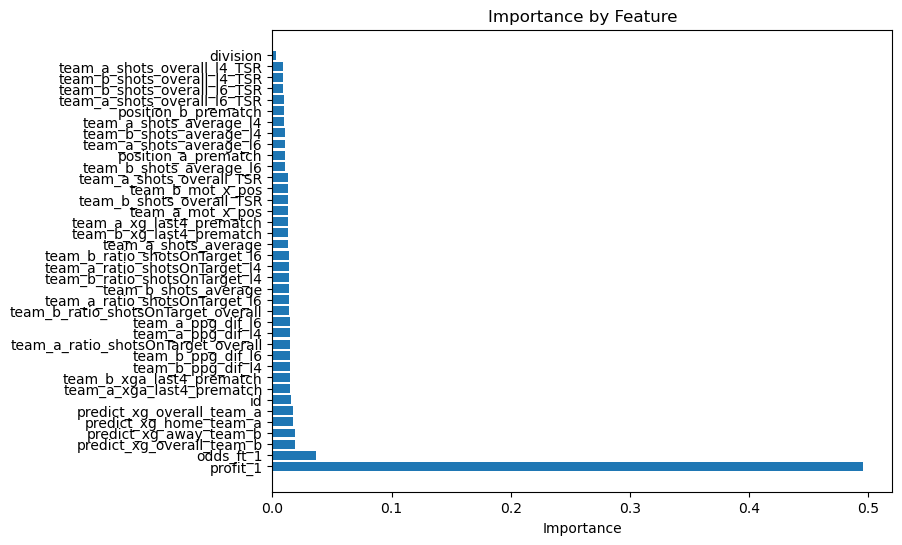

In [24]:
feature_importance = rf.feature_importances_ #importances for each feature saved by random forest
features = x_train.columns #features are columns from x
idxs = np.argsort(feature_importance)[::-1] #flip importance - most important first

#now plot features

plt.figure(figsize=(8,6))
plt.barh(range(len(features)), feature_importance[idxs], align='center')
plt.yticks(range(len(features)), np.array(features)[idxs])
plt.xlabel('Importance')
plt.title('Importance by Feature')
plt.show()

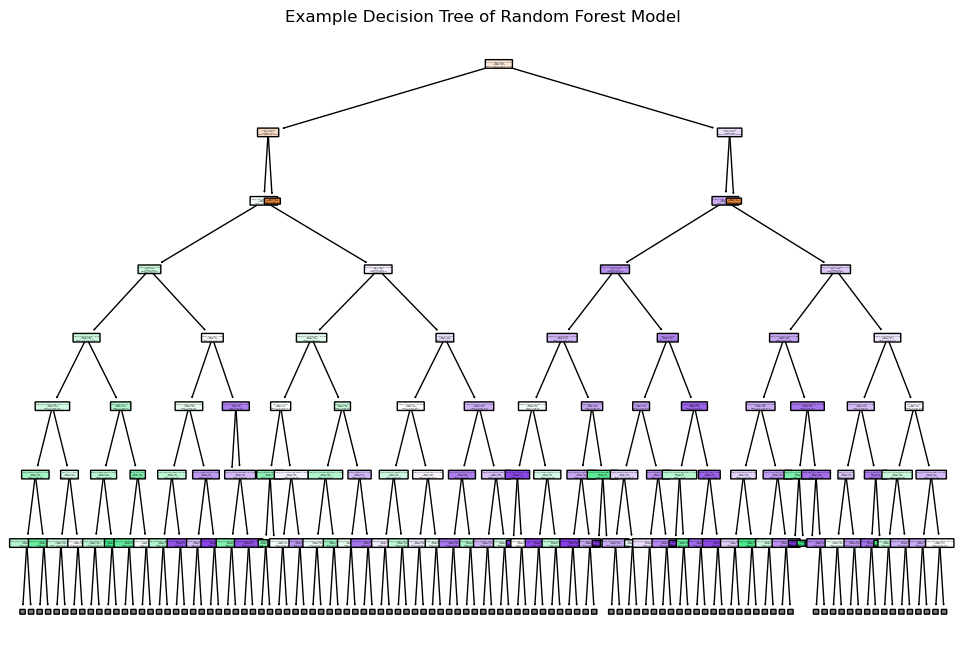

In [25]:
#visualizing a decision tree

plt.figure(figsize=(12,8)) 
plot_tree(rf.estimators_[0], filled=True, max_depth = 7, feature_names=features, class_names=['Class 0', 'Class 1', 'Class 2'], rounded=True)
#set max_depth, full tree was too large
plt.title('Example Decision Tree of Random Forest Model')
plt.show()

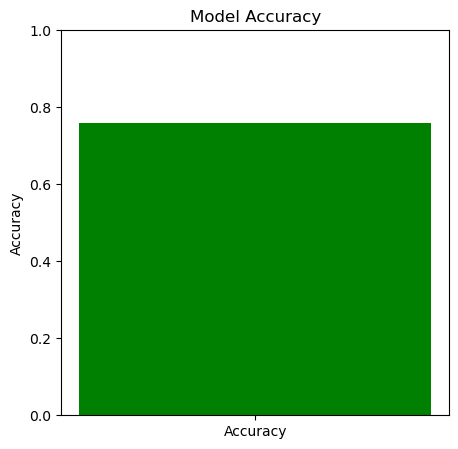

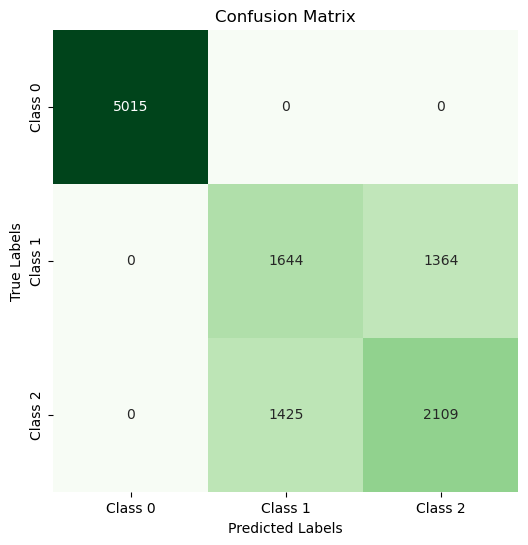

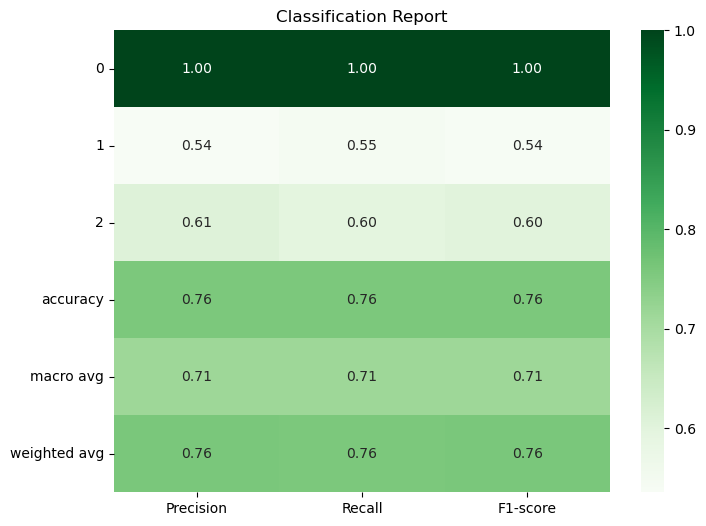

In [27]:
#accuracy
plt.figure(figsize=(5, 5))
plt.bar(['Accuracy'], [acc], color='Green')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

#cm

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#class report

class_report = classification_report(preds, y_test, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose().iloc[:, :-1]

plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.astype(float), annot=True, cmap='Greens', cbar=True, fmt='.2f', 
            xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=class_report_df.index)
plt.title('Classification Report')
plt.show()



# Part 4 - Results and Discussion:

## Visualization Report

### 1. Decision Tree Example
This visualization displays one of the 100 decision trees in our random forest model, an ensemble learning method based on tree structures. By visualizing a single tree, we gain insights into selecting an optimal `max_depth` for the entire forest. The example shown here is limited to a `max_depth` of 7 for readability, helping us observe how decisions are structured within each tree in the forest.

### 2. Feature Importance
Feature importance helps us understand the contribution of each feature to the predictions. Scikit-learn’s random forest model inherently stores feature importance scores, as the method assigns weights to each feature based on its impact on decision-making. In our analysis, we identified that the top two features influencing the model were **profit through bets** and **odds to win**. This was intriguing as betting metrics appeared to have the most significant impact on the game’s outcome.

### 3. Model Accuracy Bar Graph
A bar graph displaying model accuracy serves as a straightforward visual of our accuracy metric, which is a single scalar value. This visualization is useful for comparing our model’s accuracy against other models when stacked, providing an intuitive look at overall model performance.

### 4. Confusion Matrix
The confusion matrix visualizes hits and misses between classes, helping us understand areas where our model performs well and where it may fall short. From this matrix, we noticed that the model perfectly predicts **class 0** features, with no missed predictions—a sign of potential overfitting. Recognizing this pattern allows us to address overfitting in future model iterations.

### 5. Classification Report
The classification report presents precision, recall, and F1-score metrics for each class as a heat map. This format allows us to compare key metrics across classes visually, making it easier to identify disparities in performance and areas that may need tuning.

### Analysis

#### Preprocessing
1. **Standardization**: We standardized the features using `StandardScaler` to ensure that all features have a mean of 0 and a standard deviation of 1. This is crucial for models like SVM which are sensitive to the scale of input data.
   ```python
   from sklearn.preprocessing import StandardScaler
   features_to_scale = [col for col in data.columns if data[col].dtype in ['float64', 'int64'] and col not in ['id', 'Outcome']]
   scaler = StandardScaler()
   data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

2. **Data Splitting**: We split the dataset into training and testing sets using `train_test_split` with a test size of 20% and a random state of 42 for reproducibility.
   ```python
   from sklearn.model_selection import train_test_split
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
   ```

#### Dropped Information
We dropped the following columns from the dataset:
- `Outcome`: This is the target variable we are trying to predict.
- `profit_2`, `profit_x`, `odds_ft_x`, `odds_ft_2`: These columns were not considered since they contribute too significantly to the model's predictive power and are not given when testing.
   ```python
   x = df.drop(['Outcome', 'profit_2', 'profit_x', 'odds_ft_x', 'odds_ft_2'], axis=1)
   y = df['Outcome']
   ```

#### Model Used
We used multiple Random Forest Classifier for prediction:
1. **Random Forest Classifier**: An ensemble learning method that aggregates predictions from multiple decision trees to improve accuracy and reduce overfitting.
   ```python
   from sklearn.ensemble import RandomForestClassifier
   rf = RandomForestClassifier(n_estimators=200, random_state=42)
   rf.fit(x_train, y_train)
   preds = rf.predict(x_test)
   ```

#### Accuracy Check
We evaluated the model's performance using the following metrics:
1. **Accuracy**: The ratio of correctly predicted instances to the total instances.
   ```python
   from sklearn.metrics import accuracy_score
   acc = accuracy_score(y_test, preds)
   ```

2. **Confusion Matrix**: A table used to describe the performance of a classification model by comparing actual vs. predicted values.
   ```python
   from sklearn.metrics import confusion_matrix
   cm = confusion_matrix(y_test, preds)
   ```

3. **Classification Report**: Provides precision, recall, and F1-score for each class.
   ```python
   from sklearn.metrics import classification_report
   class_report = classification_report(y_test, preds)
   ```

   ```python
   import matplotlib.pyplot as plt
   import seaborn as sns

   # Feature Importance
   plt.figure(figsize=(8,6))
   plt.barh(range(len(features)), feature_importance[idxs], align='center')
   plt.yticks(range(len(features)), np.array(features)[idxs])
   plt.xlabel('Importance')
   plt.title('Importance by Feature')
   plt.show()

   # Model Accuracy
   plt.figure(figsize=(5, 5))
   plt.bar(['Accuracy'], [acc], color='Green')
   plt.ylim(0, 1)
   plt.title('Model Accuracy')
   plt.ylabel('Accuracy')
   plt.show()

   # Confusion Matrix
   plt.figure(figsize=(6, 6))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
   plt.title('Confusion Matrix')
   plt.xlabel('Predicted Labels')
   plt.ylabel('True Labels')
   plt.show()
   ```
